Scopo degli algoritmi di Computer Vision da usare nel nostro progetto:


    Input: Immagine 

         --> Detector [Immagine] = {Array di keypoints} 

         --> Descriptor [{Array di keypoints}] = {Matrice di features}

(Ogni Keypoint viene descritto da un numero/tipo di features differenti che dipende dall'algoritmo usato. SIFT per esempio sta per "Scale Invariant Feature Transform" e si base su features preservabili da trasformazioni spaziali ([roto-traslazioni / restizioni-espansioni])

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
#based on the size of the file, we return the width of the byte plot
#these values are taken from the paper
def get_width_bp(size_file):
    width = 1
    if size_file < 10000:
        width = 32
    elif size_file < 30000:
        width = 64
    elif size_file < 60000:
        width = 128
    elif size_file < 100000:
        width = 256
    elif size_file < 200000:
        width = 384
    elif size_file < 500000:
        width = 512
    elif size_file < 1000000:
        width = 768
    else:
        width = 1024
    return width

Funzione generale per la creazione di un byte plot secondo standard di size del paper:

In [3]:
"""
Input:  path of a file
Output: save byte plot of the image
"""

def byte_plot(file_path):

    name_file = file_path.split("/")[-1]
    #name_file = name_file.replace(".", "_")
  
    # read input
    with open(file_path, "rb") as file:
        byte_array = bytearray(file.read())
        size_input_file = len(byte_array)
        # determine width and height of the byteplot
        width_bp = get_width_bp(size_input_file)
        height_bp = int(size_input_file/width_bp)
        # very likely some bytes will be excluded
        excluded_bytes = size_input_file - (width_bp*height_bp)
        # include the excluded bytes filling the offset with 0s   
        if (excluded_bytes) != 0:
            height_bp += 1
            offset = width_bp - excluded_bytes
            for i in range(offset):
                byte_array.append(0)
        image = Image.frombytes("L", (width_bp, height_bp), bytes(byte_array))
        # Save the image as a grayscale 8-bit PNG file
        image.save("dataset/byteplot/malicious/bp_"+name_file+".png", "PNG")
        
    # Load the image into memory
    #img = cv2.imread("byteplot.png")
    #display(image)

In [ ]:
#byte_plot("dataset/office/benign/benign/0023abd58fd4138fead24170b0f2b77c.xls")
# iterate over files in
# that directory
#directory = 'dataset/office/malicious/malicious/'
#i=0
#for filename in os.listdir(directory):
#        filename = os.path.join(directory, filename)
        # checking if it is a file
#        if os.path.isfile(filename):
#            byte_plot(filename)
#            i+=1
#            os.remove(filename)
#            if i%1000 == 0:

In [4]:
# Load required libraries
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split

# Define the path to the two folders
folder_1_path = "dataset/byteplot/malicious/"
folder_2_path = "dataset/byteplot/benign/benign/"
folder_3_path = "dataset/byteplot/benign/benign_edu/"

# Read the images in each folder and store them in a list
images_1 = [cv2.imread(os.path.join(folder_1_path, image_file)) for image_file in os.listdir(folder_1_path)]
images_2 = [cv2.imread(os.path.join(folder_2_path, image_file)) for image_file in os.listdir(folder_2_path)]
images_3 = [cv2.imread(os.path.join(folder_3_path, image_file)) for image_file in os.listdir(folder_3_path)]

# Label each image with the respective label (1 for folder_1, 2 for folder_2)
labels_1 = [0 for _ in range(len(images_1))]
labels_2 = [1 for _ in range(len(images_2)+len(images_3))]

# Combine the images and labels into a single dataset
images = images_1 + images_2 + images_3
labels = labels_1 + labels_2

X = images
y = labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Convert predicted values back from one hot encoding
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 score: {:.4f}".format(f1))

In [3]:
import os
import cv2

# Define the path to the two folders
folder_1_path = "dataset/byteplot/malicious/"
folder_2_path = "dataset/byteplot/benign/benign/"
folder_3_path = "dataset/byteplot/benign/benign_edu/"

# Read the images in each folder and store them in a list
images_1 = [cv2.imread(os.path.join(folder_1_path, image_file)) for image_file in os.listdir(folder_1_path)]
images_2 = [cv2.imread(os.path.join(folder_2_path, image_file)) for image_file in os.listdir(folder_2_path)]
images_3 = [cv2.imread(os.path.join(folder_3_path, image_file)) for image_file in os.listdir(folder_3_path)]


# Label each image with the respective label (1 for folder_1, 2 for folder_2)
labels_1 = [1 for _ in range(len(images_1))]
labels_2 = [2 for _ in range(len(images_2)+len(images_3))]

# Combine the images and labels into a single dataset
images = images_1 + images_2 + images_3
labels = labels_1 + labels_2

In [4]:
from sklearn.model_selection import train_test_split

X=images
y=labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 score: {:.4f}".format(f1))

Implementazione SIFT/ORB descriptors. Partendo dal file path, generiamo di nuovo il bytre plot, ma questa volta evidenziamo i keypoints.

In [ ]:
# Define detector object
detector = cv2.SIFT_create(nfeatures=400, nOctaveLayers = 22, sigma=2, contrastThreshold=0.06, edgeThreshold=9.8)
#detector = cv2.ORB_create(400)

query_kps = []
query_des = []
db_kps = []
db_des = []

'''def draw_keypoints(img, kps):
    # Draw the keypoints on the image
    img_keypoints = cv2.drawKeypoints(img, kps, outImage=None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    # Display the resulting image
    plt.imshow(img_keypoints)
    plt.show()
'''
def byte_plotted_keypoints(file_path):
    global query_kps, query_des
    
    # read input
    with open(file_path, "rb") as file:
        byte_array = bytearray(file.read())
        size_input_file = len(byte_array)
        # determine width and height of the byteplot
        width_bp = get_width_bp(size_input_file)
        height_bp = int(size_input_file/width_bp)
        # very likely some bytes will be excluded
        excluded_bytes = size_input_file - (width_bp*height_bp)
        # include the excluded bytes filling the offset with 0s   
        if (excluded_bytes) != 0:
            height_bp += 1
            offset = width_bp - excluded_bytes
            for i in range(offset):
                byte_array.append(0)
        image = Image.frombytes("L", (width_bp, height_bp), bytes(byte_array))
        # Save the image as a grayscale 8-bit PNG file
        image.save("byteplot.png", "PNG")
        
    # Load the image into memory
    img = cv2.imread("byteplot.png")

    # Detect and compute interest points and their descriptors
    query_kps, query_des = detector.detectAndCompute(img, None)
    draw_keypoints(img, query_kps)

In [10]:
# Define detector object
detector = cv2.ORB_create(32)

total_kps=[]
total_des=[]

for image in images:
    query_kps, query_des = detector.detectAndCompute(image, None)
    total_kps.append(query_kps)
    total_des.append(query_des)

"Prova" e "Seconda Prova" sono file pressochè identici. In cui mi sono limitato a scrivere all'interno del word il titolo del file.

"Macro" invece è un word in cui a caso ho buttato qualche macro (Un attento osservatore tecnico definirebbe l'approccio "alla membro di loppide").

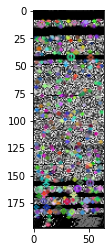

In [ ]:
byte_plotted_keypoints('Prova.docx')

In [ ]:
query_kps

(< cv2.KeyPoint 0x7f5da1342e40>,
 < cv2.KeyPoint 0x7f5da014c900>,
 < cv2.KeyPoint 0x7f5da04c2990>,
 < cv2.KeyPoint 0x7f5da04c2690>,
 < cv2.KeyPoint 0x7f5da04c2180>,
 < cv2.KeyPoint 0x7f5da04c29f0>,
 < cv2.KeyPoint 0x7f5da04c26f0>,
 < cv2.KeyPoint 0x7f5da04c2510>,
 < cv2.KeyPoint 0x7f5da04c21b0>,
 < cv2.KeyPoint 0x7f5da04c2420>,
 < cv2.KeyPoint 0x7f5da04c2630>,
 < cv2.KeyPoint 0x7f5da04c2de0>,
 < cv2.KeyPoint 0x7f5da04c2660>,
 < cv2.KeyPoint 0x7f5da04c2ba0>,
 < cv2.KeyPoint 0x7f5da04c2a80>,
 < cv2.KeyPoint 0x7f5da04c2300>,
 < cv2.KeyPoint 0x7f5da04c2d20>,
 < cv2.KeyPoint 0x7f5da04c2b10>,
 < cv2.KeyPoint 0x7f5da04c29c0>,
 < cv2.KeyPoint 0x7f5da04c22d0>,
 < cv2.KeyPoint 0x7f5da04c2570>,
 < cv2.KeyPoint 0x7f5da04c2600>,
 < cv2.KeyPoint 0x7f5da04c2a50>,
 < cv2.KeyPoint 0x7f5da04c25a0>,
 < cv2.KeyPoint 0x7f5da04c20c0>,
 < cv2.KeyPoint 0x7f5da04c2c30>,
 < cv2.KeyPoint 0x7f5da04c2f00>,
 < cv2.KeyPoint 0x7f5da04c2330>,
 < cv2.KeyPoint 0x7f5da04c2870>,
 < cv2.KeyPoint 0x7f5da04c20f0>,
 < cv2.Key

Come possiamo notare, il metodo stampa correttamente l'elenco dei keypoints (identificativi) e la relativa description matriciale. (array che quantizza le features di ciascun keypoint).

GABOR FILTERS: Implement the extraction of mean and variance from 24 filtered images. Additionally used a 16 bin intensity histogram representation as suggested by the authors. Therefore obtaining a feature vector of size 64, following the paper's lead.

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image

def gabor_filter(ksize, sigma, theta, lambd, gamma, psi):
    filter_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, cv2.CV_32F)
    return filter_kernel

def apply_gabor_filter(img, filter_kernel):
    filtered_img = cv2.filter2D(img, cv2.CV_8UC3, filter_kernel)
    return filtered_img

def extract_features(filtered_img):
    mean = np.mean(filtered_img)
    var = np.var(filtered_img)
    feature_vector = np.concatenate((np.array([mean]), np.array([var])))
    return feature_vector

def Gabor_filter_extraction(img):
    # Define the parameters for the 24 Gabor filters
    ksize = 5
    sigma_list = [1, 2, 3]
    theta_list = [0, np.pi/8, np.pi/4, 3*np.pi/8]
    lambd_list = [0.05, 0.25]
    gamma = 0.5
    psi = 0.0

    filtered_img_list = []
    for sigma in sigma_list:
        for theta in theta_list:
            for lambd in lambd_list:
                # Create the filter kernel
                filter_kernel = gabor_filter(ksize, sigma, theta, lambd, gamma, psi)
                # Apply the filter to the image
                filtered_img = apply_gabor_filter(img, filter_kernel)
                filtered_img_list.append(filtered_img)
                cv2_imshow(filtered_img)
    
    feature_vector = []
    for i, filtered_img in enumerate(filtered_img_list):
      filtered_img = cv2.normalize(filtered_img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
      features = extract_features(filtered_img)
      feature_vector.append(features)

    hist = cv2.calcHist([img], [0], None, [16], [0, 256])
    feature_vector.append(hist)
    return feature_vector


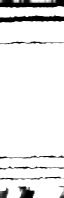

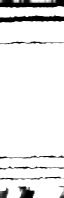

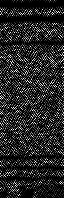

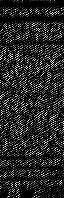

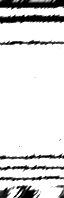

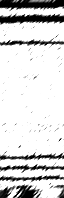

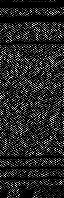

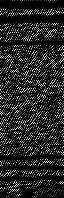

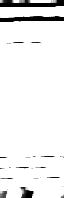

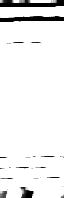

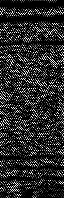

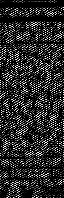

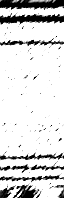

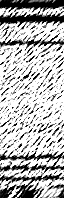

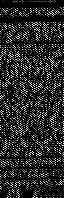

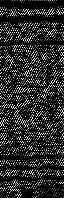

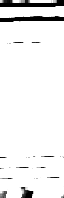

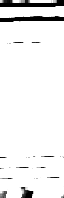

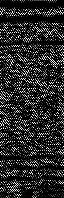

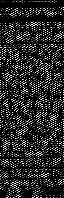

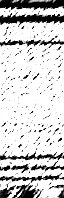

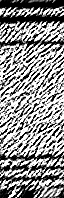

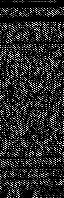

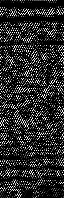

[array([ 232.73500631, 4264.78789072]),
 array([ 232.73500631, 4264.78789072]),
 array([  39.74013573, 4027.00167826]),
 array([  40.00804924, 4219.98052233]),
 array([ 220.02075442, 6312.40542468]),
 array([ 213.38581124, 7149.63531951]),
 array([  39.72356376, 4021.84222253]),
 array([  39.63999369, 4415.9242149 ]),
 array([ 238.95494003, 3486.67213311]),
 array([ 238.95494003, 3486.67213311]),
 array([  42.29829545, 5455.35420164]),
 array([  44.4983428 , 5864.12326114]),
 array([ 215.71330492, 7107.18856035]),
 array([  177.96101641, 10012.94687043]),
 array([  42.63920455, 5426.39886704]),
 array([  44.91721907, 6019.47049896]),
 array([ 239.62136995, 3387.52772514]),
 array([ 239.62136995, 3387.52772514]),
 array([  41.6395202, 5714.6071124]),
 array([  43.10748106, 6083.37481146]),
 array([ 205.95273043, 8297.70917657]),
 array([  140.19523359, 11754.74408082]),
 array([  42.19610164, 5696.77270261]),
 array([  43.38802083, 6141.00797834]),
 array([[3317.],
        [ 610.],
    

In [ ]:
Gabor_filter_extraction(img)